In [1]:
#InformationVisualisation:
#AIT664-001
#Group Members:
#Praneeth Ravirala-G01448129
#Shalvi Sanjay Lale-G01419005
#Vivek Paidigumal Patil-G01450948

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
f=pd.read_csv('Integrated_Dataset.csv')

In [88]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20291 entries, 0 to 20290
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DR_NO               20291 non-null  int64  
 1   TIME OCC            20291 non-null  object 
 2   AREA NAME           20291 non-null  object 
 3   Crm Cd Desc         20291 non-null  object 
 4   Vict Age            20291 non-null  int64  
 5   Vict Sex            20291 non-null  object 
 6   Vict Descent        20291 non-null  object 
 7   Premis Desc         20280 non-null  object 
 8   LAT                 20291 non-null  float64
 9   LON                 20291 non-null  float64
 10  Neighbourhood       19799 non-null  object 
 11  Year_x              20291 non-null  int64  
 12  Date                20291 non-null  object 
 13  LOCATION ACCOUNT #  20291 non-null  object 
 14  BUSINESS NAME       20291 non-null  object 
 15  STREET ADDRESS      20291 non-null  object 
 16  ZIP 

In [5]:
#Univariate

In [6]:
mean_age=round(np.mean(f['Vict Age']))
for i in f.index:
    if f.loc[i,'Vict Age']==0:
        f.loc[i,'Vict Age']=mean_age

In [7]:
f['Vict Age'].describe()

count    20291.000000
mean        35.130895
std         13.709383
min          2.000000
25%         28.000000
50%         29.000000
75%         42.000000
max         99.000000
Name: Vict Age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x128f07b90>,
 'caps': [<matplotlib.lines.Line2D at 0x128f341a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x128f07890>],
 'medians': [<matplotlib.lines.Line2D at 0x128f347a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x128f34aa0>],
 'means': []}

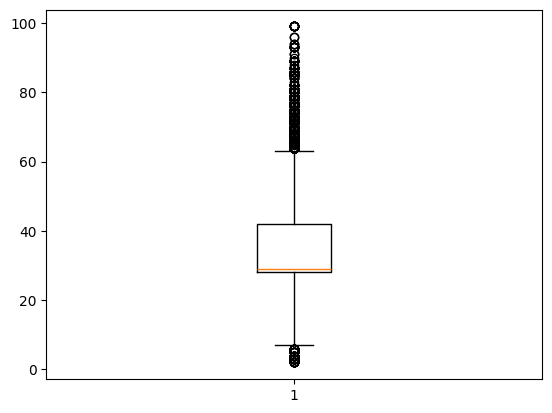

In [8]:
plt.boxplot(f['Vict Age'])

In [9]:
Q3=42
Q1=28
IQR=Q3-Q1
max1=Q3+1.5*IQR
min1=Q1-1.5*IQR
for i in f.index:
    if f.loc[i,'Vict Age']>max1:
        f.loc[i,'Vict Age']=max1
    elif f.loc[i,'Vict Age']<min1:
        f.loc[i,'Vict Age']=min1

In [10]:
f['Vict Age'].describe()

count    20291.000000
mean        34.735301
std         12.581158
min          7.000000
25%         28.000000
50%         29.000000
75%         42.000000
max         63.000000
Name: Vict Age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x128fc2360>,
 'caps': [<matplotlib.lines.Line2D at 0x128fc2900>,
 'boxes': [<matplotlib.lines.Line2D at 0x128fc1ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x128fc2ea0>],
 'fliers': [<matplotlib.lines.Line2D at 0x128fc3170>],
 'means': []}

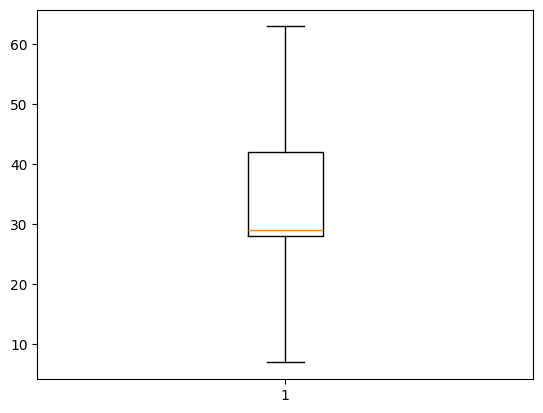

In [11]:
plt.boxplot(f['Vict Age'])

In [12]:
agegroups=[0,10,18,25,40,70]
grp_labels=['0-10','11-18','19-25','26-40','41-70']
f['Vict_AgeGrp']=pd.cut(f['Vict Age'],bins=agegroups,labels=grp_labels)

In [13]:
f['Vict_AgeGrp']

0        26-40
1        26-40
2        26-40
3        26-40
4        26-40
         ...  
20286    26-40
20287    26-40
20288    26-40
20289    26-40
20290    26-40
Name: Vict_AgeGrp, Length: 20291, dtype: category
Categories (5, object): ['0-10' < '11-18' < '19-25' < '26-40' < '41-70']

In [75]:
tb1=f.groupby('Vict_AgeGrp')['DR_NO'].nunique().sort_index()
tb1=tb1.reset_index()
tb1=tb1.rename(columns={'DR_NO':'No of Crimes'})
tb1

/var/folders/pd/ngxc57bx2yzcdv41xvd2scn80000gn/T/ipykernel_1213/3477436176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tb1=f.groupby('Vict_AgeGrp')['DR_NO'].nunique().sort_index()


,Vict_AgeGrp,No of Crimes
0,0-10,33
1,11-18,150
2,19-25,616
3,26-40,2909
4,41-70,1408


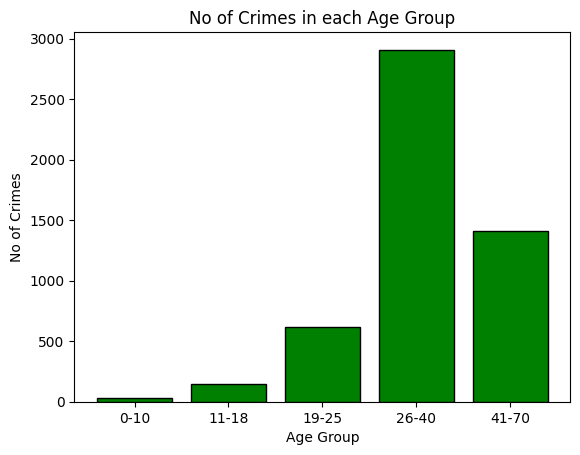

In [76]:
plt.bar(tb1['Vict_AgeGrp'],tb1['No of Crimes'],color='green',edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('No of Crimes')
plt.title('No of Crimes in each Age Group')
plt.show()

In [15]:
f['Vict Sex'].unique()

array(['M', 'F', 'X'], dtype=object)

In [77]:
tb2=f.groupby('Vict Sex')['DR_NO'].nunique().sort_index()
tb2=tb2.reset_index()
tb2=tb2.rename(columns={'DR_NO':'No of Crimes'})
tb2

,Vict Sex,No of Crimes
0,F,1828
1,M,1949
2,X,1339


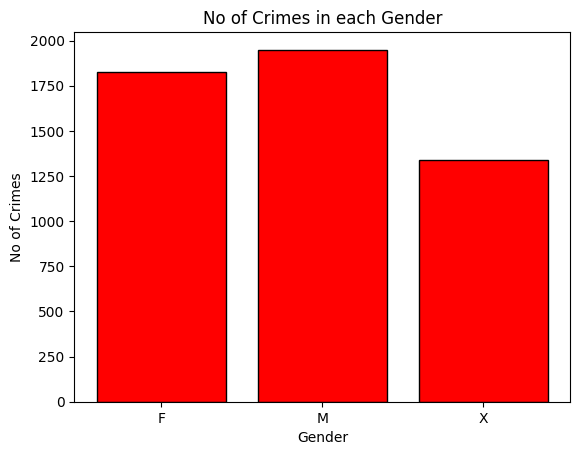

In [78]:
plt.bar(tb2['Vict Sex'],tb2['No of Crimes'],color='red',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('No of Crimes')
plt.title('No of Crimes in each Gender')
plt.show()

Text(0.5, 1.0, 'Victim Population in crimes based on Gender')

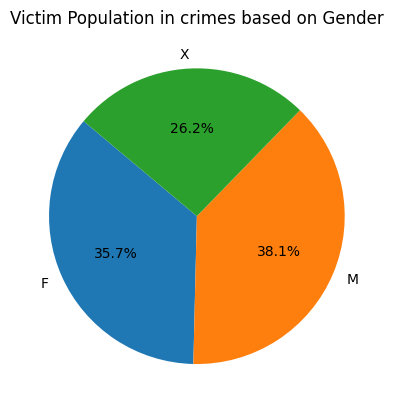

In [79]:
plt.pie(tb2['No of Crimes'], labels=tb2['Vict Sex'], autopct='%1.1f%%', startangle=140)
plt.title('Victim Population in crimes based on Gender')

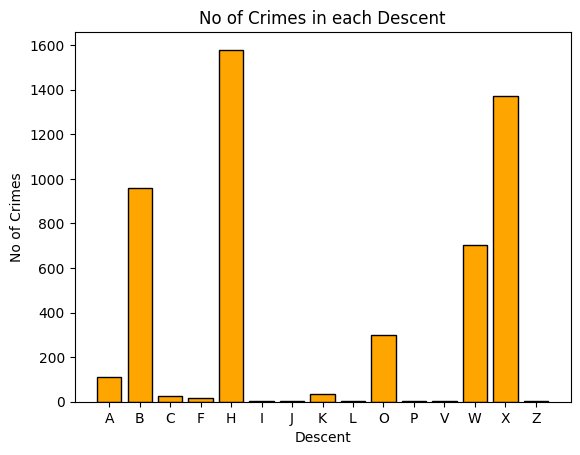

In [82]:
tb3=f.groupby('Vict Descent')['DR_NO'].nunique().sort_index()
tb3=tb3.reset_index()
tb3=tb3.rename(columns={'DR_NO':'No of Crimes'})
plt.bar(tb3['Vict Descent'],tb3['No of Crimes'],color='orange',edgecolor='black')
plt.xlabel('Descent')
plt.ylabel('No of Crimes')
plt.title('No of Crimes in each Descent')
plt.show()

In [ ]:
plt.bar(tb3['Vict Descent'],tb3['DR_NO'],color='orange',edgecolor='black')
plt.xlabel('Descent')
plt.ylabel('No of Crimes')
plt.title('No of Crimes in each Descent')
plt.show()

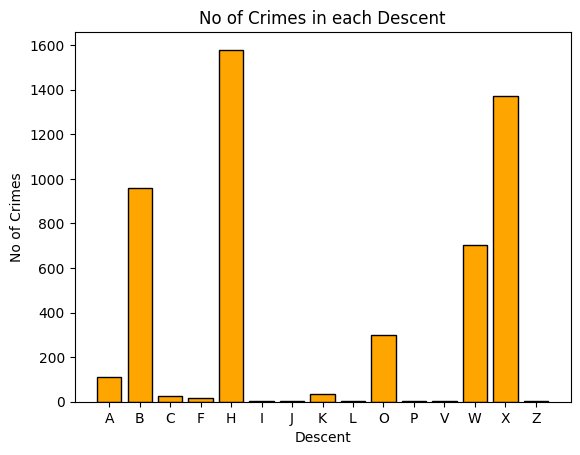

In [84]:
plt.bar(tb3['Vict Descent'],tb3['No of Crimes'],color='orange',edgecolor='black')
plt.xlabel('Descent')
plt.ylabel('No of Crimes')
plt.title('No of Crimes in each Descent')
plt.show()

In [81]:
tb3

,Vict Descent,No of Crimes
0,A,110
1,B,958
2,C,24
3,F,18
4,H,1579
5,I,4
6,J,5
7,K,35
8,L,1
9,O,300


In [85]:
f['TIME OCC']=pd.to_datetime(f['TIME OCC'])
tb4 = f.groupby(pd.Grouper(key='TIME OCC', freq='2H'))['DR_NO'].nunique()
tb4 = tb4.reset_index().rename(columns={'TIME OCC': 'Hour', 'DR_NO': 'No of Crimes'})
tb4['Hour'] = tb4['Hour'].dt.time
tb4['Hour'] = tb4['Hour'].astype(str)
tb4

/var/folders/pd/ngxc57bx2yzcdv41xvd2scn80000gn/T/ipykernel_1213/1648652774.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tb4 = f.groupby(pd.Grouper(key='TIME OCC', freq='2H'))['DR_NO'].nunique()


,Hour,No of Crimes
0,00:00:00,384
1,02:00:00,227
2,04:00:00,179
3,06:00:00,262
4,08:00:00,385
5,10:00:00,447
6,12:00:00,574
7,14:00:00,505
8,16:00:00,586
9,18:00:00,548


In [57]:
tb4.to_excel('Crimes_Hour.xlsx',index=None)

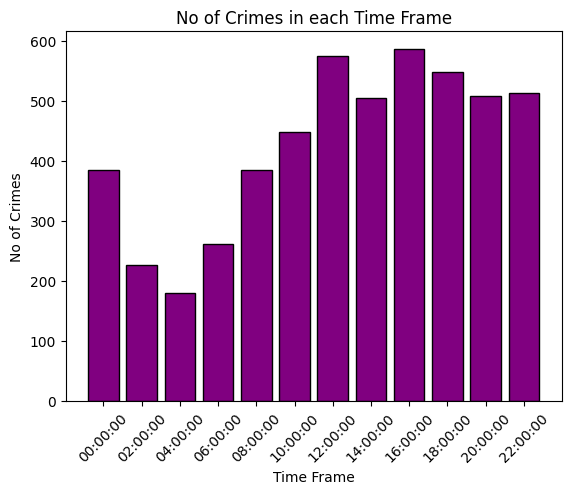

In [86]:
plt.bar(tb4['Hour'],tb4['No of Crimes'],color='purple',edgecolor='black')
plt.xlabel('Time Frame')
plt.ylabel('No of Crimes')
plt.title('No of Crimes in each Time Frame')
plt.xticks(rotation=45)
plt.show()

In [145]:
tb5= f.groupby(f['Year_x'])['Enrollment'].mean()
tb6= f.groupby(f['Year_x'])['DR_NO'].count()
tb5= tb5.reset_index()
tb6= tb6.reset_index()
pd1= pd.concat([tb5,tb6['DR_NO']],axis=1)
pd1=pd1.rename(columns={'Year_x':'Year','Enrollment':'Mean_Enrollment','DR_NO':'Number of Crimes'})
pd1

,Year,Mean_Enrollment,Number of Crimes
0,2020,368.152107,4201
1,2021,375.553748,4549
2,2022,369.622822,4706
3,2023,371.879614,4768
4,2024,365.076439,2067


In [59]:
pd1.to_excel('Enroll_crimes_year.xlsx',index=None)

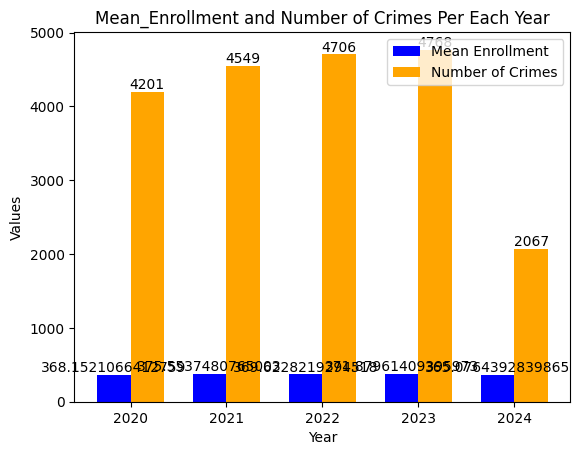

In [23]:
width = 0.35
x = np.arange(5)
bars1=plt.bar(x - width/2, pd1['Mean_Enrollment'], width=width, label='Mean Enrollment', color='blue',)
bars2=plt.bar(x + width/2, pd1['Number of Crimes'], width=width, label='Number of Crimes', color='orange')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(x, pd1['Year'])
plt.legend()
plt.title('Mean_Enrollment and Number of Crimes Per Each Year')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval),
             ha='center', va='bottom', color='black')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), 
             ha='center', va='bottom', color='black')
plt.show()

In [140]:
f['Date_x']=pd.to_datetime(f['Date_x'])
Year_Business=f['Date_x'].dt.year
Year_Business=Year_Business.astype(str)
Year_Business=pd.DataFrame(Year_Business)
Year_Business=Year_Business.rename(columns={'Date_x':'Year'})

In [146]:
count_2020=0
count_2021=0
count_2022=0
count_2023=0
count_2024=0
for i in Year_Business.index:
    if Year_Business.loc[i,'Year']=='2020':
        count_2020=count_2020+1
    elif Year_Business.loc[i,'Year']=='2021':
        count_2021=count_2021+1
    elif Year_Business.loc[i,'Year']=='2022':
        count_2022=count_2022+1
    elif Year_Business.loc[i,'Year']=='2023':
        count_2023=count_2023+1
    elif Year_Business.loc[i,'Year']=='2024':
        count_2024=count_2024+1
l1=[count_2020,count_2021,count_2022,count_2023,count_2024]
l2=['2020','2021','2022','2023','2024']
pd1=pd.DataFrame(l1,columns=['Number of Businesses'])
pd2=pd.DataFrame(l2,columns=['Year'])
pd3=pd.concat([pd2,pd1,tb6['DR_NO']],axis=1)
pd3=pd3.rename(columns={'DR_NO':'Number of Crimes'})

In [148]:
pd3
pd3.to_excel('busi_crimes_year.xlsx',index=None)

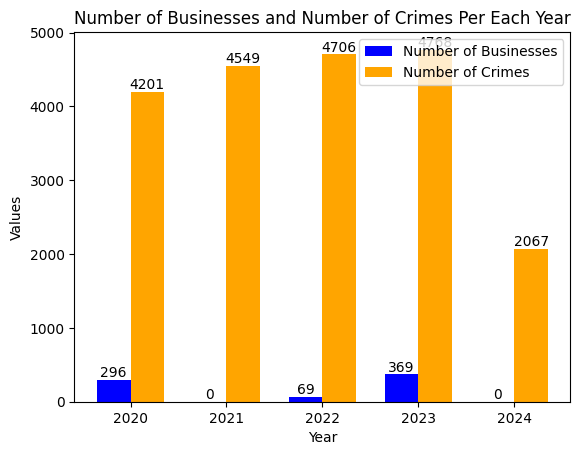

In [150]:
width = 0.35
x = np.arange(5)
bars1=plt.bar(x - width/2, pd3['Number of Businesses'], width=width, label='Number of Businesses', color='blue',)
bars2=plt.bar(x + width/2, pd3['Number of Crimes'], width=width, label='Number of Crimes', color='orange')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(x, pd3['Year'])
plt.legend()
plt.title('Number of Businesses and Number of Crimes Per Each Year')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval),
             ha='center', va='bottom', color='black')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), 
             ha='center', va='bottom', color='black')
plt.show()

In [151]:
f['Neighbourhood'].unique()

array(['South Los Angeles', 'Downtown Los Angeles', 'Koreatown',
       'Sherman Oaks', 'Northeast Los Angeles', 'Echo Park', 'Central LA',
       'Westlake', 'Westwood', nan, 'Pico-Union', 'Fairfax', 'Florence',
       'Mount Washington', 'Watts'], dtype=object)

In [152]:
region_mapping = {
    'South Los Angeles': 'Southern',
    'Downtown Los Angeles': 'Central',
    'Koreatown': 'Central',
    'Sherman Oaks': 'Western',
    'Northeast Los Angeles': 'Eastern',
    'Echo Park': 'Central',
    'Central LA': 'Central',
    'Westlake': 'Central',
    'Westwood': 'Western',
    'Pico-Union': 'Central',
    'Fairfax': 'Central',
    'Florence': 'Southern',
    'Mount Washington': 'Northern',
    'Watts': 'Southern'
}

In [153]:
f['Categorised_Nhoods']=f['Neighbourhood'].map(region_mapping)

In [154]:
f['Categorised_Nhoods']

0        Southern
1        Southern
2        Southern
3        Southern
4        Southern
           ...   
20286     Central
20287     Central
20288     Central
20289     Central
20290     Central
Name: Categorised_Nhoods, Length: 20291, dtype: object

<BarContainer object of 5 artists>

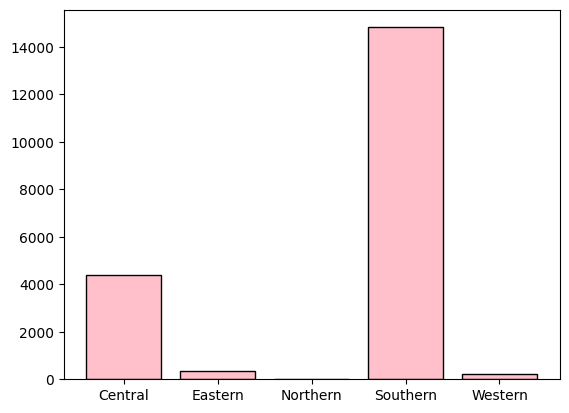

In [155]:
tb7=f['Categorised_Nhoods'].value_counts().sort_index()
tb7=tb7.reset_index()
plt.bar(tb7['Categorised_Nhoods'],tb7['count'],color='pink',edgecolor='black')

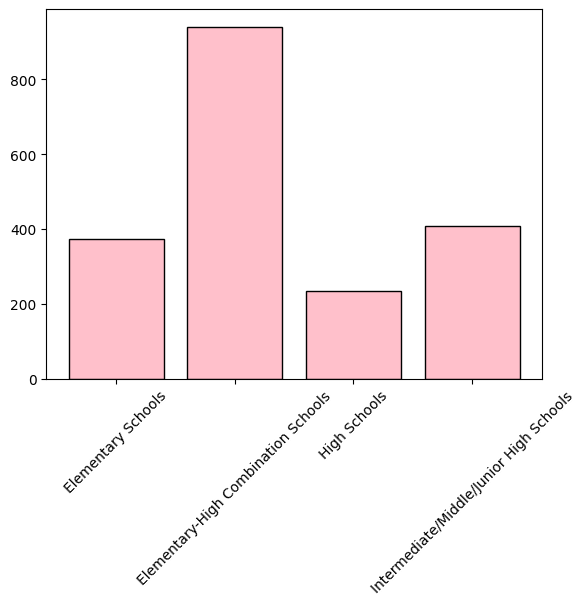

In [156]:
tb8=f.groupby('Category2')['Enrollment'].mean().sort_index()
tb8=tb8.reset_index()
plt.bar(tb8['Category2'],tb8['Enrollment'],color='pink',edgecolor='black')
plt.xticks(rotation=45)
plt.show()

In [157]:
tb8

,Category2,Enrollment
0,Elementary Schools,373.684149
1,Elementary-High Combination Schools,941.000000
2,High Schools,235.271725
3,Intermediate/Middle/Junior High Schools,407.345007


In [161]:
tb9=f.groupby(['Categorised_Nhoods','Category2'])['DR_NO'].count().sort_index()
tb9=tb9.reset_index()
tb10=pd.merge(tb9,tb8,on='Category2',how='left')
tb10=tb10.rename(columns={'DR_NO':'Number of Schools','Category2':'TypeOfSchools'})

In [166]:
tb10
#tb10.to_excel('neigh_schools_enrollment.xlsx',index=None)

,Categorised_Nhoods,TypeOfSchools,Number of Schools,Enrollment
0,Central,Elementary Schools,2866,373.684149
1,Central,Elementary-High Combination Schools,304,941.000000
2,Central,High Schools,794,235.271725
3,Central,Intermediate/Middle/Junior High Schools,422,407.345007
4,Eastern,High Schools,360,235.271725
5,Northern,Elementary Schools,13,373.684149
6,Southern,Elementary Schools,7700,373.684149
7,Southern,High Schools,1782,235.271725
8,Southern,Intermediate/Middle/Junior High Schools,5346,407.345007
9,Western,Elementary Schools,64,373.684149


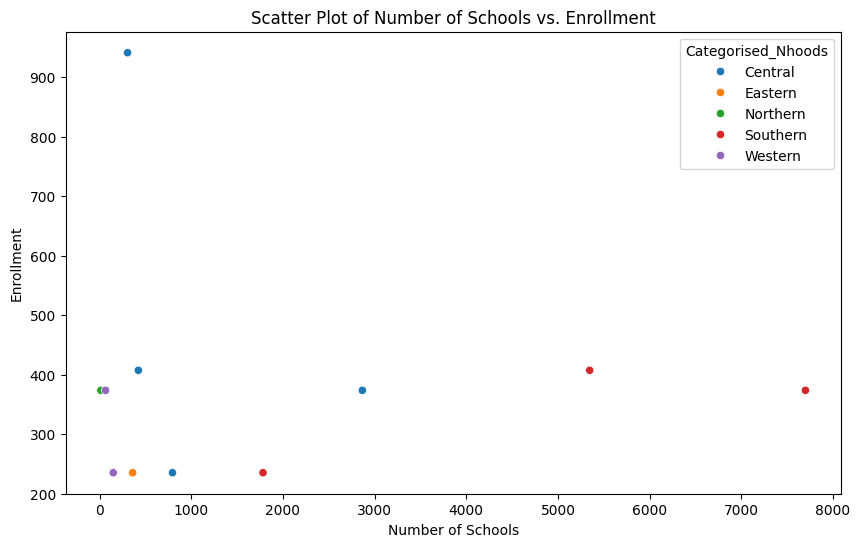

In [37]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=tb10, 
                           x='Number of Schools', 
                           y='Enrollment', 
                           hue='Categorised_Nhoods', 
                           legend=True)
plt.title('Scatter Plot of Number of Schools vs. Enrollment')
plt.xlabel('Number of Schools')
plt.ylabel('Enrollment')
plt.show()

In [169]:
tb11=pd.merge(tb10,tb7,on='Categorised_Nhoods',how='left')
tb11=tb11.rename(columns={'count':'Number of Crimes'})
tb11
#tb11.to_excel('neigh_crimes_schools.xlsx',index=None)

,Categorised_Nhoods,TypeOfSchools,Number of Schools,Enrollment,Number of Crimes
0,Central,Elementary Schools,2866,373.684149,4386
1,Central,Elementary-High Combination Schools,304,941.000000,4386
2,Central,High Schools,794,235.271725,4386
3,Central,Intermediate/Middle/Junior High Schools,422,407.345007,4386
4,Eastern,High Schools,360,235.271725,360
5,Northern,Elementary Schools,13,373.684149,13
6,Southern,Elementary Schools,7700,373.684149,14828
7,Southern,High Schools,1782,235.271725,14828
8,Southern,Intermediate/Middle/Junior High Schools,5346,407.345007,14828
9,Western,Elementary Schools,64,373.684149,212


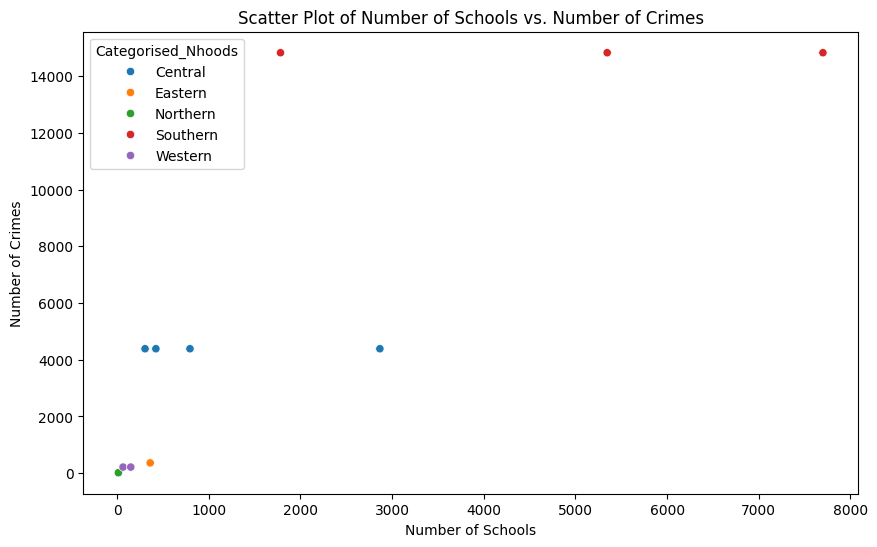

In [170]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=tb11, 
                           x='Number of Schools', 
                           y='Number of Crimes', 
                           hue='Categorised_Nhoods', 
                           legend=True)
plt.title('Scatter Plot of Number of Schools vs. Number of Crimes')
plt.xlabel('Number of Schools')
plt.ylabel('Number of Crimes')
plt.show()

In [172]:
f['BUSINESS NAME'].unique()

array(['VOX COLLEGIATE OF LOS ANGELES', 'J H DESIGN GROUP INC',
       'UNIVERSITY OF SO CALIF SCHOOL FOR EARLY CHILDHOOD EDUCATION',
       'THE ENTREPRENEUR EDUCATIONAL CENTER INC',
       'DAE AND SOOK LEE TRUST', 'STEM PREPARATORY SCHOOLS INC',
       'CROSSING THE JORDAN SLAUGHTERHOUSE OUTREACH MINISTRIES INC',
       'WATTS LEARNING CENTER FOUNDATION INC', 'PARA LOS NINOS /C',
       'JETSADA WEERANARAWAT', 'JEWISH TELEVISION NETWORK INC',
       'PACIFIC CHRISTIAN HIGH SCHOOL/C', 'MLXX LLC',
       'FRIENDS OF CLIFFORD', 'IAN ROBERTSON', 'ELLEN AKEMI MACHIKAWA',
       'KOHAN GROUP LLC', 'FTQ TAX SERVICE LLC',
       'GNLA 697 S BURLINGTON LLC',
       'KHAPABHAI D PATEL / PRAMILABEN K PATEL',
       'STAR SPORTS THEATRE ARTS & RECREATION',
       'SALVADOR MELGAREJO MIGUEL', 'FULL MOON PICKLES AND CATERING LLC',
       'PLANT LAB LLC', 'JAVIER RAMIREZ', 'CHILDRENS INSTITUTE INC',
       'HERNANDEZ MARIACHI HERITAGE SOCIETY',
       'ATLANTIC RECOVERY SERVICES', 'ISAIAH C. WILLI

In [173]:
f['ZIP CODE'].unique()

array(['90044-3430', '90015-3312', '90007-1307', '90002-3606',
       '90044-4915', '90007-3410', '90059-2322', '90003-4012',
       '90071-1115', '90005-2001', '90077-1519', '90042-4903',
       '90032-4226', '90039-3919', '90033-3816', '90023-2615',
       '90015-1212', '90057-3743', '90005-1226', '90024-6014',
       '90022-1118', '90011-5456', '90006-3301', '90006-5316',
       '90036-1764', '90003-1103', '90042-3205', '90002-3865'],
      dtype=object)

In [174]:
category_mapping = {
    'VOX COLLEGIATE OF LOS ANGELES': 'Education',
    'J H DESIGN GROUP INC': 'Business Services',
    'UNIVERSITY OF SO CALIF SCHOOL FOR EARLY CHILDHOOD EDUCATION': 'Education',
    'THE ENTREPRENEUR EDUCATIONAL CENTER INC': 'Education',
    'DAE AND SOOK LEE TRUST': 'Community Services',
    'STEM PREPARATORY SCHOOLS INC': 'Education',
    'CROSSING THE JORDAN SLAUGHTERHOUSE OUTREACH MINISTRIES INC': 'Community Services',
    'WATTS LEARNING CENTER FOUNDATION INC': 'Education',
    'PARA LOS NINOS /C': 'Community Services',
    'JETSADA WEERANARAWAT': 'Individual Contributors',
    'JEWISH TELEVISION NETWORK INC': 'Arts & Culture',
    'PACIFIC CHRISTIAN HIGH SCHOOL/C': 'Education',
    'MLXX LLC': 'Business Services',
    'FRIENDS OF CLIFFORD': 'Community Services',
    'IAN ROBERTSON': 'Individual Contributors',
    'ELLEN AKEMI MACHIKAWA': 'Individual Contributors',
    'KOHAN GROUP LLC': 'Business Services',
    'FTQ TAX SERVICE LLC': 'Business Services',
    'GNLA 697 S BURLINGTON LLC': 'Business Services',
    'KHAPABHAI D PATEL / PRAMILABEN K PATEL': 'Individual Contributors',
    'STAR SPORTS THEATRE ARTS & RECREATION': 'Arts & Culture',
    'SALVADOR MELGAREJO MIGUEL': 'Individual Contributors',
    'FULL MOON PICKLES AND CATERING LLC': 'Business Services',
    'PLANT LAB LLC': 'Business Services',
    'JAVIER RAMIREZ': 'Individual Contributors',
    'CHILDRENS INSTITUTE INC': 'Education',
    'HERNANDEZ MARIACHI HERITAGE SOCIETY': 'Arts & Culture',
    'ATLANTIC RECOVERY SERVICES': 'Community Services',
    'ISAIAH C. WILLIS III': 'Individual Contributors',
    'ALDAMA ELEMENTARY PTA': 'Community Services',
    'CAMERON BAINES': 'Individual Contributors'
}


In [175]:
f['Categorised_Businesses']=f['BUSINESS NAME'].map(category_mapping)

In [176]:
f['Categorised_Businesses'].unique()

array(['Education', 'Business Services', 'Community Services',
       'Individual Contributors', 'Arts & Culture'], dtype=object)

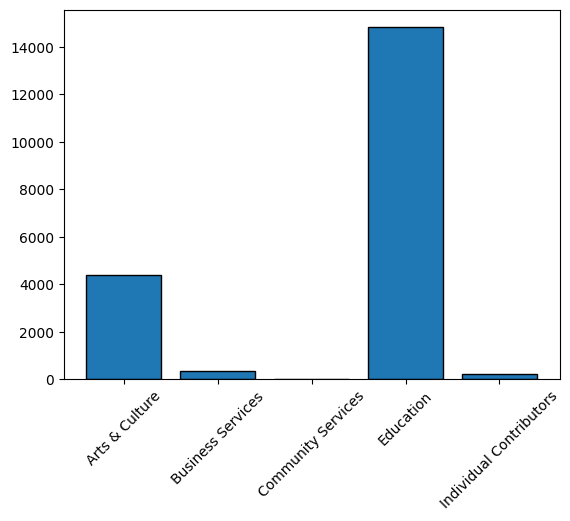

In [177]:
tb12=f['Categorised_Businesses'].value_counts().sort_index()
tb12=tb12.reset_index()
plt.bar(tb12['Categorised_Businesses'],tb7['count'],edgecolor='black')
plt.xticks(rotation=45)
plt.show()

In [178]:
tb13=f.groupby(['Categorised_Nhoods','Categorised_Businesses'])['DR_NO'].count().sort_index()
tb13=tb13.reset_index()
tb13=tb13.rename(columns={'DR_NO':'Number of Businesses'})
tb14=pd.merge(tb7,tb13,on='Categorised_Nhoods',how='right')
tb14=tb14.rename(columns={'count':'Number of Crimes'})

In [183]:
tb14
#tb14.to_excel('busi_crimes_schools_neigh.xlsx',index=None)

,Categorised_Nhoods,Number of Crimes,Categorised_Businesses,Number of Businesses
0,Central,4386,Arts & Culture,126
1,Central,4386,Business Services,1597
2,Central,4386,Community Services,863
3,Central,4386,Education,126
4,Central,4386,Individual Contributors,1674
5,Eastern,360,Business Services,180
6,Eastern,360,Education,180
7,Northern,13,Community Services,13
8,Southern,14828,Business Services,1782
9,Southern,14828,Community Services,3564


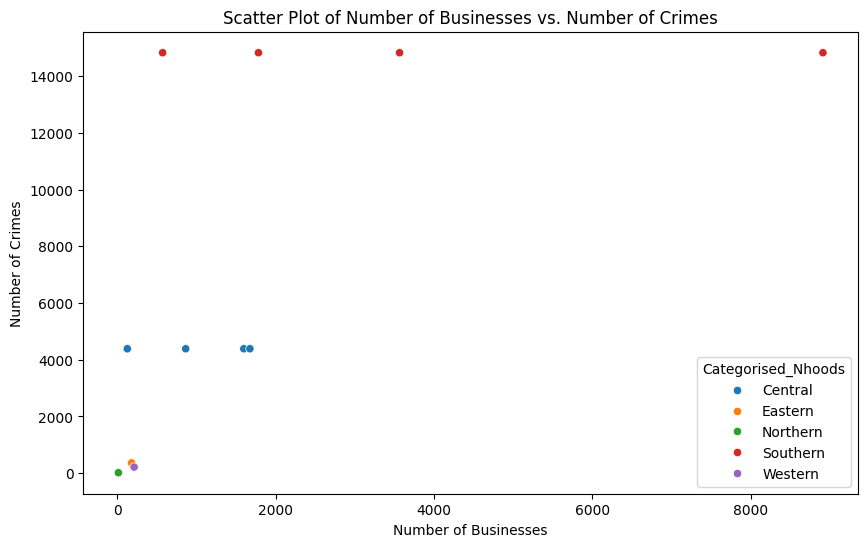

In [48]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=tb14, 
                           x='Number of Businesses', 
                           y='Number of Crimes', 
                           hue='Categorised_Nhoods', 
                           legend=True)
plt.title('Scatter Plot of Number of Businesses vs. Number of Crimes')
plt.xlabel('Number of Businesses')
plt.ylabel('Number of Crimes')
plt.show()

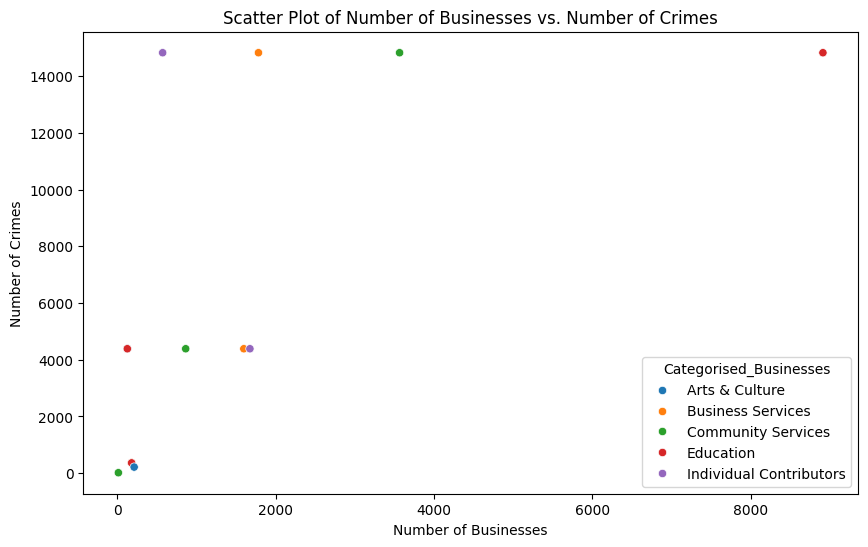

In [49]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=tb14, 
                           x='Number of Businesses', 
                           y='Number of Crimes', 
                           hue='Categorised_Businesses', 
                           legend=True)
plt.title('Scatter Plot of Number of Businesses vs. Number of Crimes')
plt.xlabel('Number of Businesses')
plt.ylabel('Number of Crimes')
plt.show()

In [184]:
tb15=pd.merge(tb10,tb14,on='Categorised_Nhoods',how='inner')

In [205]:
tb15=tb15.drop_duplicates(subset=['Categorised_Nhoods'])
tb15
#tb15.to_excel('cat_business_all.xlsx',index=None)

,Categorised_Nhoods,TypeOfSchools,Number of Schools,Enrollment,Number of Crimes,Categorised_Businesses,Number of Businesses
0,Central,Elementary Schools,2866,373.684149,4386,Arts & Culture,126
20,Eastern,High Schools,360,235.271725,360,Business Services,180
22,Northern,Elementary Schools,13,373.684149,13,Community Services,13
23,Southern,Elementary Schools,7700,373.684149,14828,Business Services,1782
35,Western,Elementary Schools,64,373.684149,212,Arts & Culture,212


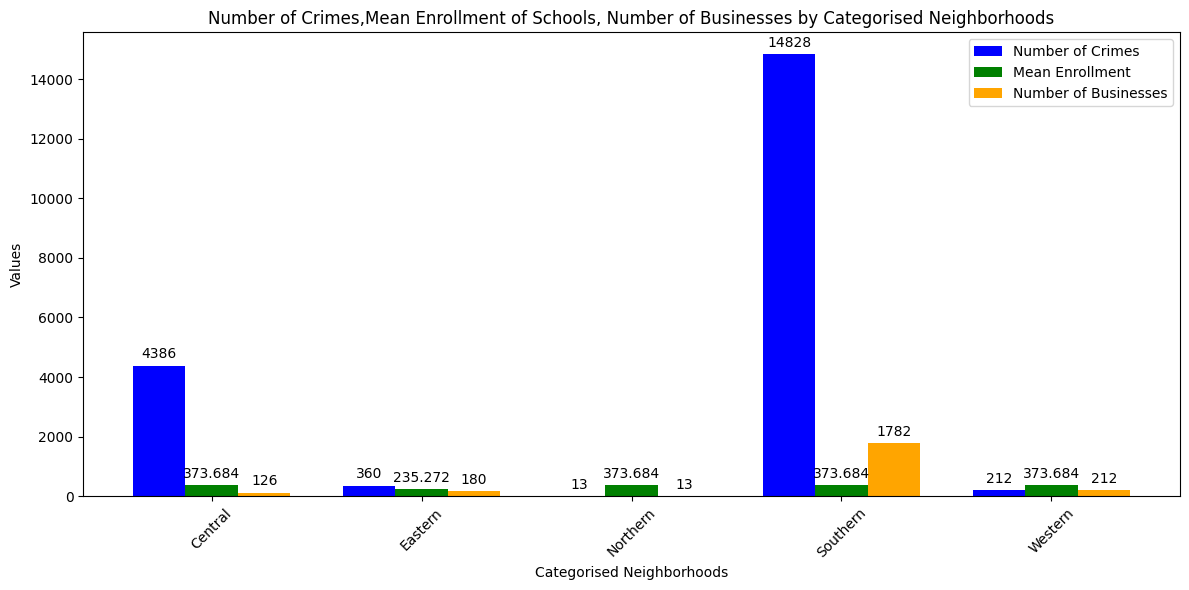

In [206]:
x = np.arange(len(tb15['Categorised_Nhoods']))
width = 0.25
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width, tb15['Number of Crimes'], width, label='Number of Crimes', color='blue')
bars2 = ax.bar(x, tb15['Enrollment'], width, label='Mean Enrollment', color='green')
bars3 = ax.bar(x + width, tb15['Number of Businesses'], width, label='Number of Businesses', color='orange')

ax.set_xlabel('Categorised Neighborhoods')
ax.set_ylabel('Values')
ax.set_title('Number of Crimes,Mean Enrollment of Schools, Number of Businesses by Categorised Neighborhoods')
ax.set_xticks(x)
ax.set_xticklabels(tb15['Categorised_Nhoods'], rotation=45)
ax.legend()

for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, padding=3)

plt.tight_layout()
plt.show()


In [54]:
#References:
#[1].Data.gov. (2024, October 4). City of Los Angeles - Crime Data from 2020 to Present.
#https://catalog.data.gov/dataset/crime-data-from-2020-to-present
#[2].Data.gov. (2024a, September 20). City of Los Angeles - Listing of active businesses.
#https://catalog.data.gov/dataset/listing-of-active-businesses
#[3].County of Los Angeles open data. (n.d.).
#https://data.lacounty.gov/datasets/32331535785b405d869ca7a7aa3abb1f/explore
#[4].W3Schools.com. (n.d.). https://www.w3schools.com/python/pandas/pandas_cleaning.asp
#GeeksforGeeks. (2024, June 11). What is Data Visualization and Why is It Important?
#GeeksforGeeks. https://www.geeksforgeeks.org/data-visualization-and-its-importance/
#[5].GeeksforGeeks. (2024b, September 12). Data preprocessing in data mining.
#GeeksforGeeks. https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/
#[6].GeeksforGeeks. (2022, November 14). Google Geocoding Web Service (JSON response).
#GeeksforGeeks.
#https://www.geeksforgeeks.org/google-geo-coding-web-service-json-response/
#[7].Merge, join, concatenate and compare — pandas 2.2.3 documentation. (n.d.).
#https://pandas.pydata.org/docs/user_guide/merging.html